# **A Predictive Analysis of Heart Disease**

ADS 599 | Team 3 | Anusia Edward & Saba Alemayehu

>[A Predictive Analysis of Heart Disease](#scrollTo=vbomqAF_uHfS)

>>[Preprocessing and Explanatory Data Analysis (EDA)](#scrollTo=0yeZ5tliunSq)

>>[Modeling and Evaluations](#scrollTo=FCYQAdPEuv0f)

>>>[Model 1: Logistic Regression](#scrollTo=8xVD6TRsXvx2)

>>>[Model 2: Naive Bayes](#scrollTo=Jgcp18KaXxyO)

>>>[Model 3: Neural Network](#scrollTo=gcCVDeOiXzwP)

>>>[Model 4: Decision Tree](#scrollTo=P-EGjzJpX2AD)

>>>[Model 5: Random Forest](#scrollTo=12IQDjr6X4GW)

>>>[Model 6: Linear Discriminant Analysis (LDA)](#scrollTo=wPgkEgL7X_N4)

>>[References](#scrollTo=z9aI711yalFu)



In [ ]:
# Necessary Imports
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score,
classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (RepeatedStratifiedKFold,
                                     GridSearchCV,cross_val_score)
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## **Preprocessing and Explanatory Data Analysis (EDA)**

In [ ]:
# Loading in the Data
heart_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_2020i.csv')

In [ ]:
# Visualizing the Data
heart_df.head(3)

,Unnamed: 0,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,311689,31.01,No,No,No,1,0,No,Male,60-64,White,No,Yes,Good,6,No,No,No,No
1,78443,25.09,Yes,No,Yes,15,15,No,Male,65-69,White,No,Yes,Fair,7,No,Yes,Yes,No
2,49511,38.52,No,Yes,No,0,0,No,Male,50-54,White,No,Yes,Good,5,No,No,No,No


Upon initial investigation of this dataset there are a few things that standout. First, there are a lot of variables that are binary in text format. For example, the target variable of ‘HeartDisease’ is a binary variable include ‘yes’ or ‘no’ responses. This will need to be transformed into numeric binary values of 0 and 1. The numeric values will need to be checked for outliers and possible normalized. Further inspection into the data will need to be conducted in order to identify any other corrections.

In [ ]:
# Size of Data
heart_df.shape

(19188, 19)

There are a total of eighteen features (the nineteenth feature contains IDs) and 19,188 records within this dataset.

The next step is to determine the missing values by employing the following function: {dataframe name}.isnull().sum(). The .isnull() part of the function determines which records are null records, while the .sum() part of the function returns the number of null records.

In [ ]:
# Checking for Missing Variables
heart_df.isnull().sum()

Unnamed: 0          0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
HeartDisease        0
dtype: int64

Additionally, through matplotlib’s plt.figure function, a heatmap of the missing values was visualized. Through these functions it was determined that there were no missing values within the data.


<Figure size 600x600 with 0 Axes>

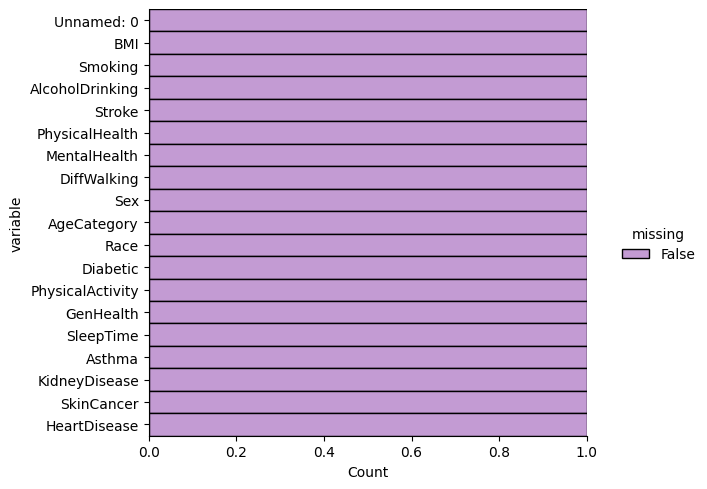

In [ ]:
# Visualizing Missing Variables through Heat Map
plt.figure(figsize=(6,6))
sns.displot(
    data= heart_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    palette=["#C39BD3"],
    alpha=1,
    multiple="fill",
    aspect=1.25
)
plt.show()

Essentially, there are no missing values present within the data. This indicates that no filling of missing variables through imputations are necessary. If there were missing values it could have been addressed through a KNN imputation.

After the checking of missing values, the next step was determining if there were any inconsistent entries or duplicate entries. This was determined by using the following function: {dataframe name}.unique(). This function aided with determining if there were any inconsistencies within the data as well as any duplicate entries.

In [ ]:
# Checking Unique Values for Each Variable
print('HeartDisease', heart_df['HeartDisease'].unique())
print('BMI', heart_df['BMI'].unique())
print('Smoking', heart_df['Smoking'].unique())
print('AlcoholDrinking', heart_df['AlcoholDrinking'].unique())
print('Stroke', heart_df['Stroke'].unique())
print('PhysicalHealth', heart_df['PhysicalHealth'].unique())
print('MentalHealth', heart_df['MentalHealth'].unique())
print('DiffWalking', heart_df['DiffWalking'].unique())
print('Sex', heart_df['Sex'].unique())
print('AgeCategory', heart_df['AgeCategory'].unique())
print('Race', heart_df['Race'].unique())
print('Diabetic', heart_df['Diabetic'].unique())
print('PhysicalActivity', heart_df['PhysicalActivity'].unique())
print('GenHealth', heart_df['GenHealth'].unique())
print('SleepTime', heart_df['SleepTime'].unique())
print('Asthma', heart_df['Asthma'].unique())
print('KidneyDisease', heart_df['KidneyDisease'].unique())
print('SkinCancer', heart_df['SkinCancer'].unique())

HeartDisease ['No' 'Yes']
BMI [31.01 25.09 38.52 ... 18.18 30.84 39.27]
Smoking ['No' 'Yes']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
PhysicalHealth [ 1 15  0  2  3 14 30  5  7 21  8 20 10  4  6  9 28 25 29 12 24 16 17 13
 27 18 19 26 11 22 23]
MentalHealth [ 0 15  1  2  5 30  7  6 10  3  4 20 11 24 25  8 19 23 14 29 12 22  9 21
 28 18 13 16 17 26 27]
DiffWalking ['No' 'Yes']
Sex ['Male' 'Female']
AgeCategory ['60-64' '65-69' '50-54' '55-59' '35-39' '75-79' '70-74' '30-34' '45-49'
 '18-24' '40-44' '25-29' '80 or older']
Race ['White' 'Hispanic' 'Black' 'Other' 'Asian'
 'American Indian/Alaskan Native']
Diabetic ['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ['Yes' 'No']
GenHealth ['Good' 'Fair' 'Very good' 'Excellent' 'Poor']
SleepTime [ 6  7  5  4  8  9 12 10  3  2 15  1 18 24 11 16 14 20 13 19 22]
Asthma ['No' 'Yes']
KidneyDisease ['No' 'Yes']
SkinCancer ['No' 'Yes']


Looking at the unique values for each of the variables gives us insights into what kind of cleaning will need to be done. The following variables will need to be made into biary 0,1 values from yes,no text: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, PhysicalActivity, Asthma, KidneyDisease, and SkinCancer. The following variables are the numeric variables that will need to be handled: BMI, PhysicalHealth, MentalHealth, and SleepTime. The following variables will need to handeled through dummy coding the text data: Race, Diabetic, and GenHealth.

The .nunique() function was used in order to get an idea of the different outcomes for each of the variables. This is important for determining the type of recoding that will need to take place for the categorical variables in terms of whether or not the categorical variables were binary, ordinal, or nominal.

In [ ]:
heart_df.nunique()

Unnamed: 0          19188
BMI                  1847
Smoking                 2
AlcoholDrinking         2
Stroke                  2
PhysicalHealth         31
MentalHealth           31
DiffWalking             2
Sex                     2
AgeCategory            13
Race                    6
Diabetic                4
PhysicalActivity        2
GenHealth               5
SleepTime              21
Asthma                  2
KidneyDisease           2
SkinCancer              2
HeartDisease            2
dtype: int64

In order to further determine if any of the records within the data was duplicated the following function was employed: {dataframe name}.duplicated. There were no duplicates within the data that needed to be handled.


In [ ]:
# Checking for Duplicates
heart_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19183    False
19184    False
19185    False
19186    False
19187    False
Length: 19188, dtype: bool

In the following step we are double checking the data types for each of the variables. This is an important step to ensure that the data type matches the acutal data. If the data type does not match with the actual data, then it will be difficult to carry out data transformations in the future.

In [ ]:
# Checking Datatypes
heart_df.dtypes

Unnamed: 0            int64
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
HeartDisease         object
dtype: object

In order to determine the type of encoding that needed to be carried out, bar charts of each of the categorical variables were produced. The bar charts were produced using plotly’s go.Histogram function.

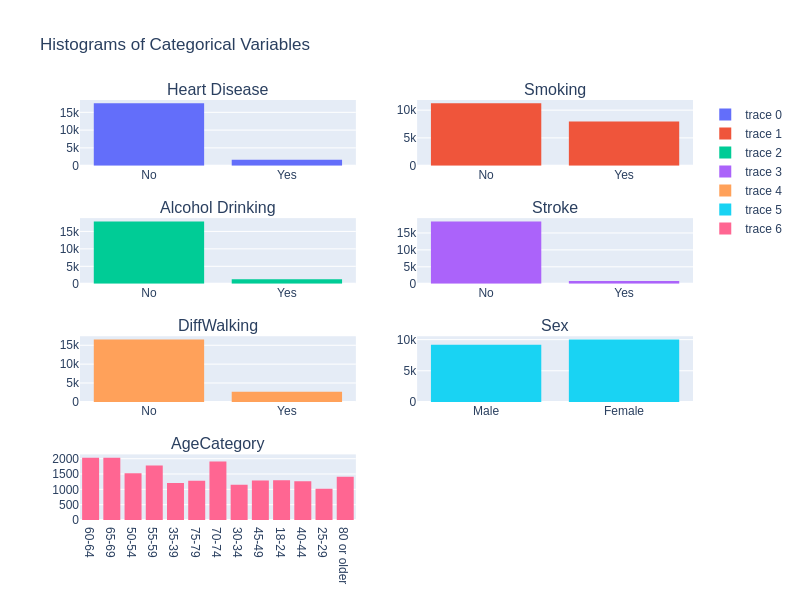

In [ ]:
# Visualizing Categorical Variable Distributions (1-7)
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=("Heart Disease", "Smoking", "Alcohol Drinking",
                    "Stroke", "DiffWalking", "Sex", "AgeCategory"))
fig.add_trace(go.Histogram(x=heart_df['HeartDisease']),row=1, col=1)
fig.add_trace(go.Histogram(x=heart_df['Smoking']),row=1, col=2)
fig.add_trace(go.Histogram(x=heart_df['AlcoholDrinking']),row=2, col=1)
fig.add_trace(go.Histogram(x=heart_df['Stroke']),row=2, col=2)
fig.add_trace(go.Histogram(x=heart_df['DiffWalking']),row=3, col=1)
fig.add_trace(go.Histogram(x=heart_df['Sex']),row=3, col=2)
fig.add_trace(go.Histogram(x=heart_df['AgeCategory']),row=4, col=1)

fig.update_layout(height=600, width=800,
                  title_text="Histograms of Categorical Variables",
                  bargap=0.2)
fig.show("png")

The histograms seen above and below were created using plotly’s go.Histogram function.

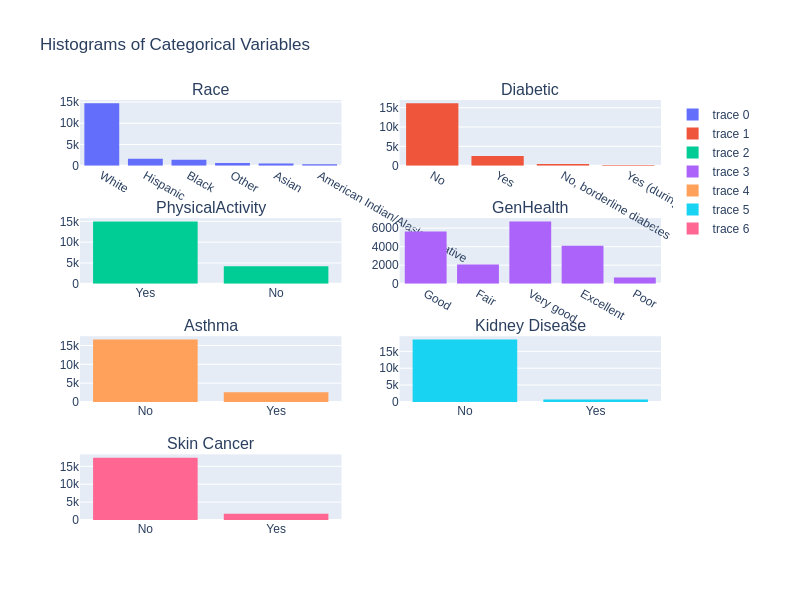

In [ ]:
# Visualizing Categorical Variable Distributions (8-14)
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=("Race", "Diabetic", "PhysicalActivity",
                    "GenHealth", "Asthma", "Kidney Disease",
                    "Skin Cancer"))
fig.add_trace(go.Histogram(x=heart_df['Race']),row=1, col=1)
fig.add_trace(go.Histogram(x=heart_df['Diabetic']),row=1, col=2)
fig.add_trace(go.Histogram(x=heart_df['PhysicalActivity']),row=2, col=1)
fig.add_trace(go.Histogram(x=heart_df['GenHealth']),row=2, col=2)
fig.add_trace(go.Histogram(x=heart_df['Asthma']),row=3, col=1)
fig.add_trace(go.Histogram(x=heart_df['KidneyDisease']),row=3, col=2)
fig.add_trace(go.Histogram(x=heart_df['SkinCancer']),row=4, col=1)

fig.update_layout(height=600, width=800,
                  title_text="Histograms of Categorical Variables",
                  bargap=0.2)
fig.show("png")

Based on the bar charts, it was evident that the following variables were to be recorded using a binary encoder: heart_disease, smoking, alcohol_drinking, stroke, diff_walking, physical_activity, asthma, kisney_disease, skin_cancer, and sex.

The next step was the encoding of the categorical variables.

In [ ]:
# Recoding Categorical Variables through Binary Encoder

# Heart Disease -> Target Variable
heart_df['heart_disease'] = heart_df['HeartDisease'].map({'Yes':1, 'No':0})

# Smoking
heart_df['smoking'] = heart_df['Smoking'].map({'Yes':1, 'No':0})

# Alcohol Drinking
heart_df['alcohol_drinking'] = heart_df['AlcoholDrinking'].map({'Yes':1,
                                                                'No':0})

# Stroke
heart_df['stroke'] = heart_df['Stroke'].map({'Yes':1, 'No':0})

# Difficulty Walking
heart_df['diff_walking'] = heart_df['DiffWalking'].map({'Yes':1, 'No':0})

# Physical Activity
heart_df['physical_activity'] = heart_df['PhysicalActivity'].map({'Yes':1,
                                                                  'No':0})

# Asthma
heart_df['Asthma'] = heart_df['Asthma'].map({'Yes':1, 'No':0})

# Kidney Disease
heart_df['kidney_disease'] = heart_df['KidneyDisease'].map({'Yes':1, 'No':0})

# Skin Cancer
heart_df['skin_cancer'] = heart_df['SkinCancer'].map({'Yes':1, 'No':0})

# Sex
heart_df['sex_female'] = heart_df['Sex'].map( {'Male':0, 'Female':1} )

The binary encoder transformed the ‘yes’ and ‘no’ responses into 1 and 0. The following function was used to recode these variables: {dataframe name}[{variable name}] = {dataframe name}[‘column name’].map({‘Yes’:1, ‘No’:0}). Essentially the .map() function was employed onto the column within the dataframe to change all the ‘Yes’ responses into 1 and ‘No’ responses into 0. This is an important step, as not all machine learning algorithms can operate on labeled data directly (Bhattacharyya, 2020). Instead, machine learning models need data to be transformed into numeric values.

The next step is to dummy code the following variables: age, race, diabetic, and general health. These attribues are nominal so it is important that pandas' get_dummies function is employed.

In [ ]:
# Dummy Coding Categorical Variables

# Age
heart = pd.concat([heart_df, pd.get_dummies(heart_df['AgeCategory'],
                                           prefix='age')], axis=1)
# Race
heart = pd.concat([heart, pd.get_dummies(heart['Race'],
                                           prefix='race')], axis=1)
# Diabetic
heart = pd.concat([heart, pd.get_dummies(heart['Diabetic'],
                                           prefix='diabetic')], axis=1)
# GenHealth
heart = pd.concat([heart, pd.get_dummies(heart['GenHealth'],
                                           prefix='genhealth')], axis=1)

In [ ]:
# checking the recoding results
heart.head(3)

,Unnamed: 0,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy),genhealth_Excellent,genhealth_Fair,genhealth_Good,genhealth_Poor,genhealth_Very good
0,311689,31.01,No,No,No,1,0,No,Male,60-64,...,1,1,0,0,0,0,0,1,0,0
1,78443,25.09,Yes,No,Yes,15,15,No,Male,65-69,...,1,1,0,0,0,0,1,0,0,0
2,49511,38.52,No,Yes,No,0,0,No,Male,50-54,...,1,1,0,0,0,0,0,1,0,0


Following this step, dimensionality reduction was conducted. Dimensionality reduction is an important step in data cleaning as it aids with removing any unnecessary noise that can hinder the predictability of the model that is to be produced later on (Raj, 2021). This was conducted by removing any unnecessary columns. For example, the columns that were used to create a binary encoded version of the information were no longer necessary and therefore removed using the .drop() function as seen below.

In [ ]:
# Dropping Unecessary Variables
heart.drop(['Unnamed: 0','HeartDisease', 'Smoking', 'AlcoholDrinking',
               'Stroke', 'DiffWalking', 'Sex',
               'PhysicalActivity', 'Asthma',
               'KidneyDisease', 'SkinCancer',
            'AgeCategory', 'Race', 'Diabetic', 'GenHealth'], axis=1,
           inplace=True)

In [ ]:
#list(heart.columns)

Reformatting, in terms of renaming the variables for clarity, was also carried out in the next step below.

In [ ]:
# Renaming Variables for Clarity
heart.rename(columns = {'age_18-24':'age_18'}, inplace = True)
heart.rename(columns = {'age_25-29':'age_25'}, inplace = True)
heart.rename(columns = {'age_30-34':'age_30'}, inplace = True)
heart.rename(columns = {'age_35-39':'age_35'}, inplace = True)
heart.rename(columns = {'age_40-44':'age_40'}, inplace = True)
heart.rename(columns = {'age_45-49':'age_45'}, inplace = True)
heart.rename(columns = {'age_50-54':'age_50'}, inplace = True)
heart.rename(columns = {'age_55-59':'age_55'}, inplace = True)
heart.rename(columns = {'age_60-64':'age_60'}, inplace = True)
heart.rename(columns = {'age_65-69':'age_65'}, inplace = True)
heart.rename(columns = {'age_70-74':'age_70'}, inplace = True)
heart.rename(columns = {'age_75-79':'age_75'}, inplace = True)
heart.rename(columns = {'age_80 or older':'age_80'}, inplace = True)
heart.rename(columns = {'race_American Indian/Alaskan Native':'race_native'},
             inplace = True)
heart.rename(columns = {'diabetic_No, borderline diabetes':'diabetic_no_b'},
             inplace = True)
heart.rename(columns = {'diabetic_Yes (during pregnancy)':'diabetic_yes_preg'},
             inplace = True)

In [ ]:
# Rechecking Results
heart.head(3)

,BMI,PhysicalHealth,MentalHealth,SleepTime,heart_disease,smoking,alcohol_drinking,stroke,diff_walking,physical_activity,...,race_White,diabetic_No,diabetic_no_b,diabetic_Yes,diabetic_yes_preg,genhealth_Excellent,genhealth_Fair,genhealth_Good,genhealth_Poor,genhealth_Very good
0,31.01,1,0,6,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1,25.09,15,15,7,0,1,0,1,0,1,...,1,1,0,0,0,0,1,0,0,0
2,38.52,0,0,5,0,0,1,0,0,1,...,1,1,0,0,0,0,0,1,0,0


In [ ]:
# Descriptive Stats for Numeric Variables
heart[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,19188.000000,19188.000000,19188.000000,19188.000000
mean,28.371373,3.381801,3.940953,7.097457
std,6.379154,7.968298,8.001876,1.443355
min,13.310000,0.000000,0.000000,1.000000
25%,24.090000,0.000000,0.000000,6.000000
50%,27.370000,0.000000,0.000000,7.000000
75%,31.320000,2.000000,3.000000,8.000000
max,91.820000,30.000000,30.000000,24.000000


From the seventeen independent variables, four were identified as quantitative variables. The four variables are as follows: BMI, PhysicalHealth, MentalHealth, and SleepTime. The descriptive statistics for each of the quantitative variables can be seen above. In the table above, the mean, standard deviation, minimum, first quartile value, median, third quartile value, maximum, and total count were included. From the table, the average BMI among the study’s participants was approximately 28.3. It should be noted that BMI is broken down into three categories. The three categories are as follows: healthy weight (18.5-24.9), overweight (25.0 - 29.9), and obese (30.0+) (All about adult BMI, 2022). Based on this, it can be determined that the average participant of this study would be classified as overweight. Another interesting insight to note is that the average participant had approximately seven hours of sleep, with the minimum amount of recorded sleep time being an hour. Additionally, participants' physical and mental health could be considered as well, as out of a thirty day period it was reported on average that they experienced approximately three poor physical or mental health days.

Following this, the next step in the data cleaning process was to look into the necessary transformations that would need to be carried out. In order to do this, histograms and boxplots of the numeric variables were produced.

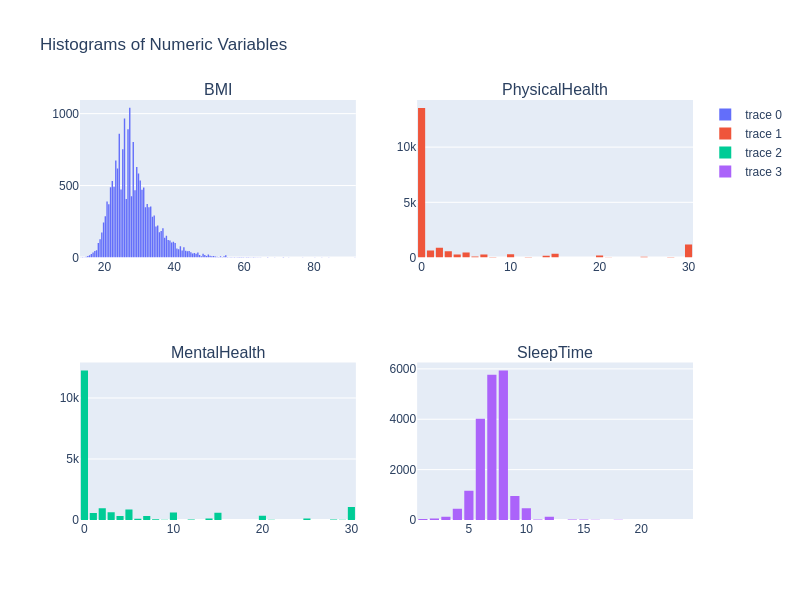

In [ ]:
# Visualizing Numeric Variables Distributions
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("BMI", "PhysicalHealth", "MentalHealth",
                    "SleepTime"))
fig.add_trace(go.Histogram(x=heart['BMI']),row=1, col=1)
fig.add_trace(go.Histogram(x=heart['PhysicalHealth']),row=1, col=2)
fig.add_trace(go.Histogram(x=heart['MentalHealth']),row=2, col=1)
fig.add_trace(go.Histogram(x=heart['SleepTime']),row=2, col=2)

fig.update_layout(height=600, width=800,
                  title_text="Histograms of Numeric Variables",
                  bargap=0.2)
fig.show("png")

The results obtained from the histograms indicated that BMI, PhysicalHealth, and MentalHealth are heavily right skewed. The variable SleepTime is slightly right skewed. In other words, the mean overestimates the most common values.

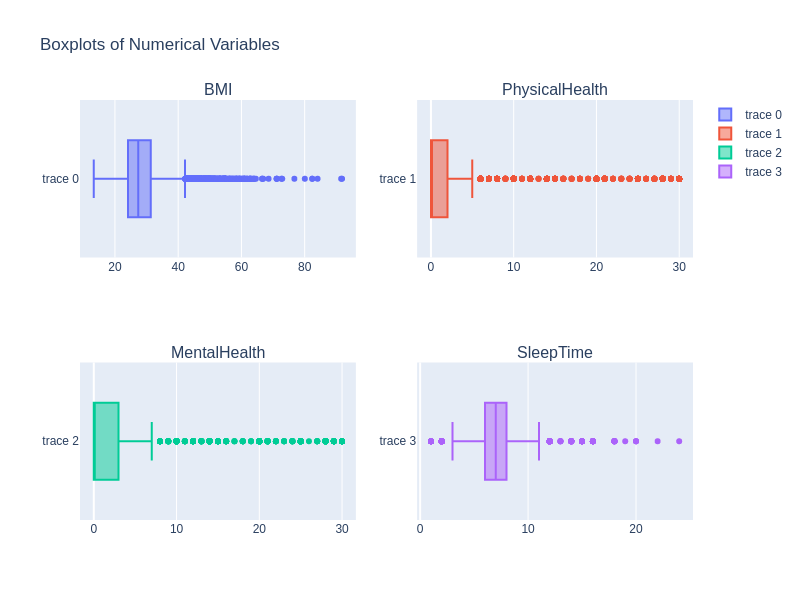

In [ ]:
# Boxplots of Numeric Variables
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("BMI", "PhysicalHealth", "MentalHealth",
                    "SleepTime"))
fig.add_trace(go.Box(x=heart['BMI']),row=1, col=1)
fig.add_trace(go.Box(x=heart['PhysicalHealth']),row=1, col=2)
fig.add_trace(go.Box(x=heart['MentalHealth']),row=2, col=1)
fig.add_trace(go.Box(x=heart['SleepTime']),row=2, col=2)
fig.update_layout(height=600, width=800,
                  title_text="Boxplots of Numerical Variables")
fig.show("png")

Boxplots were produced to visualize outliers. This step was necessary in order to determine if transformations, in terms of handling outliers, were necessary. When looking at the boxplots produced, it is evident that the following variables had outliers: BMI, PhysicalHealth, MentalHealth and SleepTime. In terms of BMI, the maximum value was noted to be 12 while the minimum value was noted to be 94. A BMI value of 12 indicates an underweight person while a BMI value of 94 indicates an overweight person. Both values are plausible and therefore the outliers for this variable were determined to be kept. When looking at the outliers for PhysicalHealth, it included values within the range of thirty. A value of thirty makes sense as the scale was determined to be how many days a person had physical health problems in the span of thirty days. The same can be stated for the MentalHealth variable. In terms of SleepTime, the recorded times were within the 24 hour time period, which makes sense within the context of this study, and therefore was retained. Essentially, the outliers for each of these variables made sense within the context of this study and therefore were retained.


<Axes: >

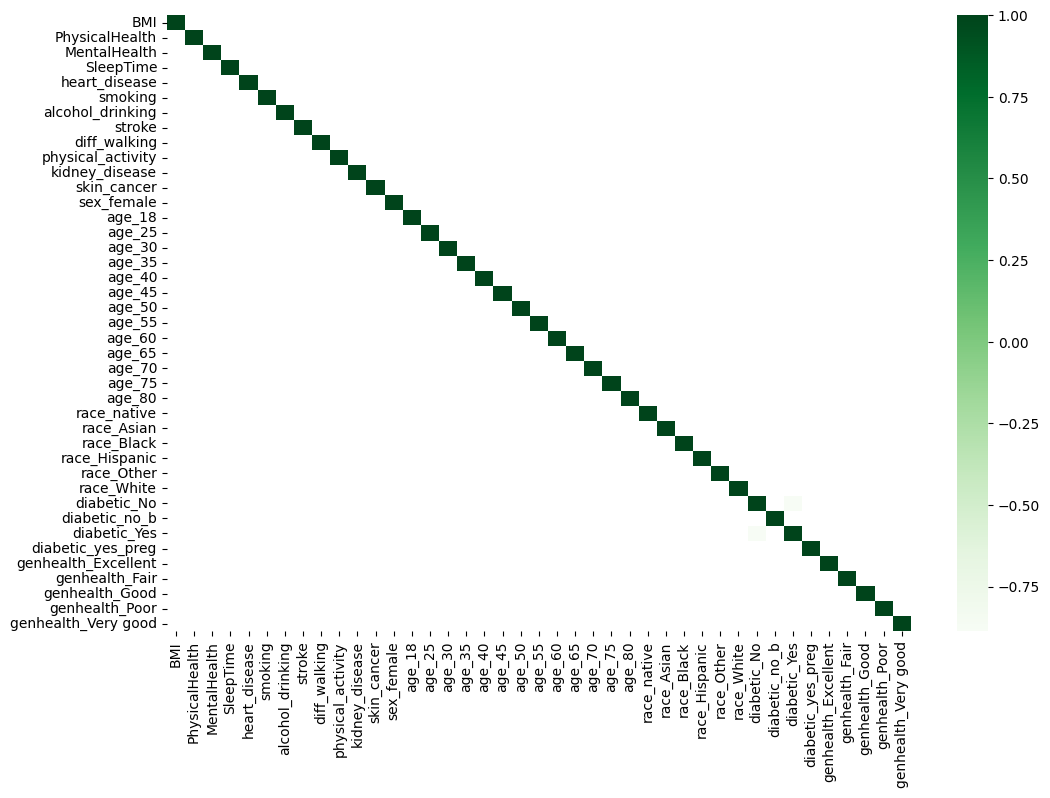

In [ ]:
# Checking for Multicollinearity
corr = heart.corr()
kot = corr[abs(corr) >= 0.6]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

There are no concerns of multicollinearity that need to be addressed as seen through the visualization above. The code was set up in such a way that if there was a correlation value greater than 0.6 it would appear as a colored square. Considering that there are no colored squares (aside from correlation amongst the same feature), it can be asserted that there are no concerns of multicollinearity.

The next step seen below is splitting the data. This step was taken preceding the normalization of the data in order to ensure that there were no concerns of data leakage. The data was split using sklearn’s train_test_split function with the following specifications: x, y, stratify = y, test_size=0.20, and random_state = 42. The first specification of ‘x’ was previously specified as all the variables aside from the target variable heart_disease. The next specification of ‘y’ was previously defined as the target variable: heart_disease. The third specification of ‘stratify=y’ indicates that the sets are to be stratified using the target variable. The splits were stratified on the target variable in order to correct for the class imbalance noted previously within the target variable. The fourth specification of ‘test_size = 0.20’, indicates that the test size proportion is to be 20% of the total data, which defaults the train size to being 80% of the total data. Finally, the ‘random_state=42’ specification was set in order for the split to be reproducible.


In [ ]:
# Splitting the data 80-20 Split + Stratification on heart_disease
x = heart.loc[:, heart.columns !="heart_disease"]
y = heart['heart_disease']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
# Checking the Dimensions
print('x_train:', x_train.shape, 'y_train:',y_train.shape)
print('x_test:', x_test.shape, 'y_test', y_test.shape)

x_train: (15350, 40) y_train: (15350,)
x_test: (3838, 40) y_test (3838,)


Following the splitting of the data, the splits were normalized based on the train data. This was done in order to ensure that no data leakage occurred through the processing of the data. In order to carry out this step, sklearn’s preprocessing.StandardScaler() function was employed. The numeric variables from the train data were scaled by fitting the previous function onto the train data. It should be noted that the  preprocessing.StandardScaler() function was saved as scaler. This was then called onto the train data in conjunction with the .fit() function. Then the normalized data was indexed and fit to the actual x_train and x_test sets, thus resulting in normalized splits.


In [ ]:
# Normalizing the Numeric Data Based on the Train
scaler = preprocessing.StandardScaler()
scaler.fit(x_train[["BMI", "PhysicalHealth", "MentalHealth",
                    "SleepTime"]])
tNorm = pd.concat([pd.DataFrame(scaler.transform(heart[["BMI", "PhysicalHealth",
                                                        "MentalHealth",
                                                        "SleepTime"]]),
                                 columns=["z_BMI", "z_PhysicalHealth",
                                                        "z_MentalHealth",
                                                        "z_SleepTime"]),
                   heart[['heart_disease','smoking','alcohol_drinking','stroke',
                          'diff_walking','physical_activity','kidney_disease',
                          'skin_cancer','sex_female','age_18','age_25','age_30',
                          'age_35','age_40','age_45','age_50','age_55','age_60',
                          'age_65','age_70','age_75','age_80','race_native',
                          'race_Asian','race_Black','race_Hispanic',
                          'race_Other','race_White','diabetic_No',
                          'diabetic_no_b','diabetic_Yes','diabetic_yes_preg',
                          'genhealth_Excellent','genhealth_Fair',
                          'genhealth_Good','genhealth_Poor',
                          'genhealth_Very good']]],axis=1)

In [ ]:
# setting the normalized using the index
trainNorm = tNorm.iloc[x_train.index]
testNorm = tNorm.iloc[x_test.index]

In [ ]:
# adjusting the sets to have the normalized data
x_train = trainNorm[['z_BMI', 'z_PhysicalHealth','z_MentalHealth','z_SleepTime',
                     'smoking','alcohol_drinking','stroke',
                          'diff_walking','physical_activity','kidney_disease',
                          'skin_cancer','sex_female','age_18','age_25','age_30',
                          'age_35','age_40','age_45','age_50','age_55','age_60',
                          'age_65','age_70','age_75','age_80','race_native',
                          'race_Asian','race_Black','race_Hispanic',
                          'race_Other','race_White','diabetic_No',
                          'diabetic_no_b','diabetic_Yes','diabetic_yes_preg',
                          'genhealth_Excellent','genhealth_Fair',
                          'genhealth_Good','genhealth_Poor',
                          'genhealth_Very good']]
x_test = testNorm[['z_BMI', 'z_PhysicalHealth','z_MentalHealth','z_SleepTime',
                     'smoking','alcohol_drinking','stroke',
                          'diff_walking','physical_activity','kidney_disease',
                          'skin_cancer','sex_female','age_18','age_25','age_30',
                          'age_35','age_40','age_45','age_50','age_55','age_60',
                          'age_65','age_70','age_75','age_80','race_native',
                          'race_Asian','race_Black','race_Hispanic',
                          'race_Other','race_White','diabetic_No',
                          'diabetic_no_b','diabetic_Yes','diabetic_yes_preg',
                          'genhealth_Excellent','genhealth_Fair',
                          'genhealth_Good','genhealth_Poor',
                          'genhealth_Very good']]

In [ ]:
# checking the dimensions to ensure normalization was done correctly
print('x_train:', x_train.shape, 'y_train:',y_train.shape)
print('x_test:', x_test.shape, 'y_test', y_test.shape)

x_train: (15350, 40) y_train: (15350,)
x_test: (3838, 40) y_test (3838,)


The following step is to handle class imbalance through the SMOTE oversampling method. Within this method the minority class, which in this case is the heart disease patients, is oversampled for the train data. This is done in order to esure the accuracy of the results obtained.

In [ ]:
# handling class imbalnce
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [ ]:
# double checking that class imbalance was fixed
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of label '1':\
 {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0':\
 {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X:\
 {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y:\
 {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1':\
 {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0':{}".format(sum(y_train_res == 0)))

Before OverSampling, the shape of train_X: (15350, 40)
Before OverSampling, the shape of train_y: (15350,) 

Before OverSampling, counts of label '1': 1314
Before OverSampling, counts of label '0': 14036 

After OverSampling, the shape of train_X: (28072, 40)
After OverSampling, the shape of train_y: (28072,) 

After OverSampling, counts of label '1': 14036
After OverSampling, counts of label '0':14036


A bar chart of the frequency of heart disease versus non heart disease patients by race was visualized below. This visualization was created using plotly’s px.histogram function. It should be noted that for the purposes of the study, the respondents were categorized by the following racial categories: White, Black, Asian, American Indian/Alaskan Native, Other, and Hispanic. When observing the visualization, it is evident that the majority of respondents are primarily White. The racial group that is most affected by heart disease is the American Indian/Alaskan Native populations. This was determined by calculating the proportion of heart disease individuals to the total population within the respective races.

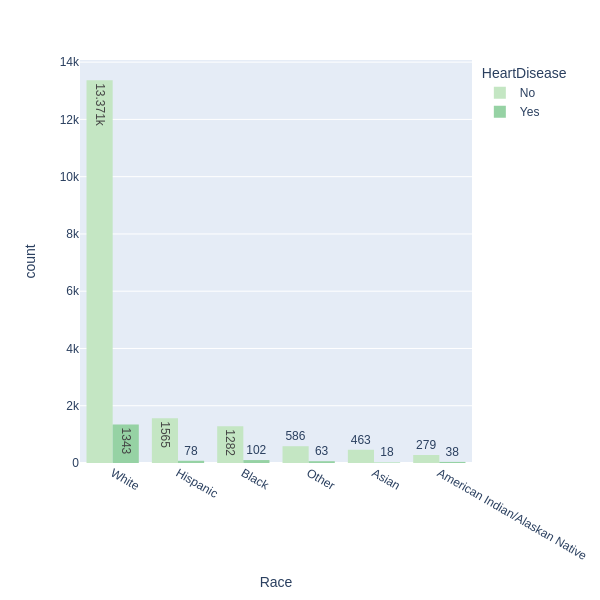

In [ ]:
# Race by HeartDisease
fig = px.histogram(heart_df,x ='Race',color='HeartDisease',
              barmode='group',text_auto=True,
              color_discrete_sequence=px.colors.sequential.Blugrn,
             width=600, height=600)
fig.show("png")

In order to gain greater insights into the data, sleeptimes in relation to BMI by whether or not the individuals have heart disease was visualized through the scatterplot below. From the scatterplot below it is evident that there is no clear trend amongst heart disease vs non-heart-disease individuals. This is the case, as those with and without heart disease have a wide rage of BMI and Sleeptimes. There is no sector that is heavily populated with heart disease patients or non-heart disease patients, and therefore no trend is present.

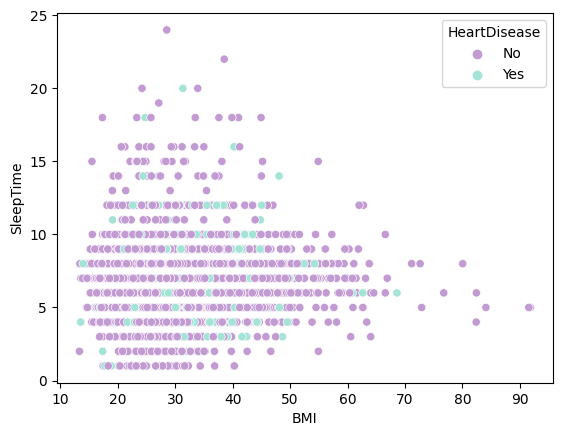

In [ ]:
# BMI vs Sleep Time by Heart Disease
sns.scatterplot(data=heart_df, x="BMI", y="SleepTime", hue="HeartDisease",
                palette = ["#C39BD3", "#A3E4D7"]);

A bar chart of the frequency of heart disease by age group was produced using plotly’s px.histogram function as seen below. Through this visualization, it can be seen that the group that is most affected by heart disease are those that are in their late sixties. More specifically, those in the age range of 65 to 69 have the highest risk for heart disease. The second most at-risk group for heart disease are those within the age range of 75 to 79 years of age. The least at-risk group of individuals for heart disease are those within the age range of 18 to 24 years of age.


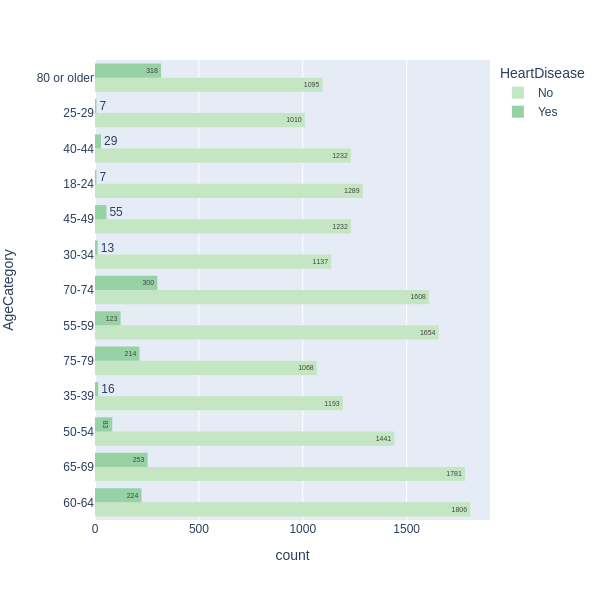

In [ ]:
# Age by HeartDisease
fig = px.histogram(heart_df,y ='AgeCategory',color='HeartDisease',
              barmode='group',text_auto=True,
              color_discrete_sequence=px.colors.sequential.Blugrn,
             width=600, height=600)
fig.show("png")

In order to gain greater insights into the data, Physical Health in relation to BMI by whether or not the individuals have heart disease was visualized through the scatterplot below. From the scatterplot below it is evident that there is no clear trend amongst heart disease vs non-heart-disease individuals. This is the case, as those with and without heart disease have a wide rage of BMI and Physical Health scores. There is no sector that is heavily populated with heart disease patients or non-heart disease patients, and therefore no trend is present.

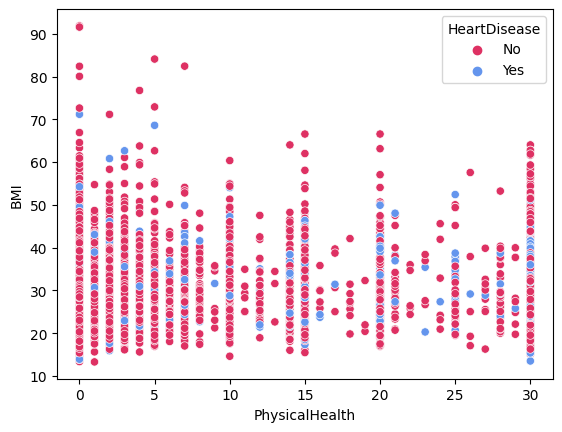

In [ ]:
# Physical Health vs BMI by Heart Disease
sns.scatterplot(data=heart_df, x="PhysicalHealth", y="BMI",
                hue="HeartDisease",
                palette = ["#DE3163", "#6495ED"]);

When looking at a bar chart of the frequency of heart disease, by whether or not a person has asthma, it was evident that those who had asthma had the higher risk for heart disease (as seen in the figure below). This was determined by calculating the total number of respondents with heart disease for respondents with and without asthma and dividing those values by the total number of non asthma respondents and asthma respondents, respectively. Through these calculations, it was determined that eight percent of those without asthma had heart disease, while twelve percent of those with asthma had heart disease. This visualization was created using plotly’s px.histogram function.

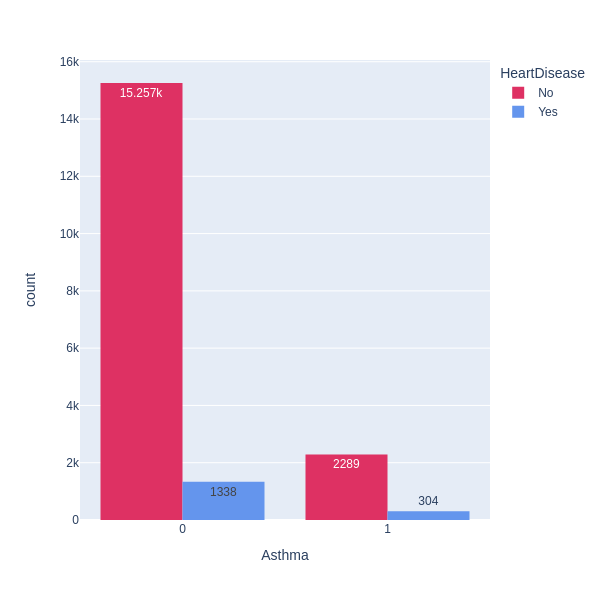

In [ ]:
# Asthma by HeartDisease
fig = px.histogram(heart_df, x ='Asthma',color='HeartDisease',
              barmode='group',text_auto=True,
              color_discrete_sequence=["#DE3163", "#6495ED"],
             width=600, height=600)
fig.show("png")

When looking at a bar chart of the frequency of heart disease, by whether or not a person has kidney disease, it was evident that those who had kidney disease had the higher risk for heart disease (as seen in the figure below). This was determined by calculating the total number of respondents with heart disease for respondents with and without kidney disease and dividing those values by the total number of non kidney disease respondents and kidney disease respondents, respectively. Through these calculations, it was determined that seven percent of those without kidney disease had heart disease, while twenty-nine percent of those with kidney disease had heart disease. This visualization was created using plotly’s px.histogram function.


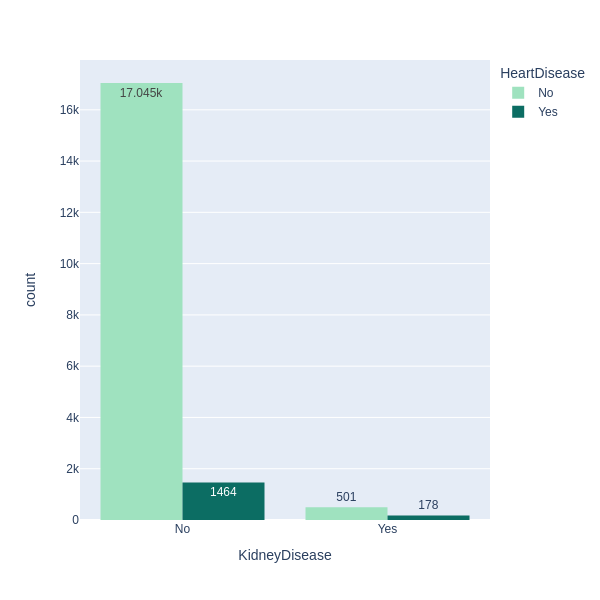

In [ ]:
# Kidney Disease by HeartDisease
fig = px.histogram(heart_df, x ='KidneyDisease',color='HeartDisease',
              barmode='group',text_auto=True,
              color_discrete_sequence=["#9FE2BF", "#0c6d63"],
             width=600, height=600)
fig.show("png")

## **Modeling and Evaluations**

Variables to Use:
*   ```X_train_res```
*   ```y_train_res```
*   ```x_test```
*   ```y_test```

### Model 1: Logistic Regression

The first model that is to be produced is the logistic regression model. The following summarizes each of the steps taken below to build the logistic regression model: The way in which the logistic regression model was set up was first by defining the model and model parameters, defining the grid search, summarizing grid search results, predicting on the test data, and then evaluating the model. The ‘model’ variable was set to the LogisticRegression() function. This function was imported from the sklearn.linear_model package. The ‘solvers’ variable was set to ‘liblinear’ in order to handle the regularization that was set in the next step. The ‘penalty’ function was set to ‘L2’. The L2 regularization, commonly referred to as Ridge Regularization, was specified in order to avoid overfitting (Sklearn.Linear_Model.LogisticRegression, n.d.). The ‘c_values’ variable was set to ‘[10, 1.0, 0.1, 0.01]’ in order to find the best splits. After the model and parameters were set, the grid search was defined. The purpose of the grid search was to find the optimal parameters for the model (Sklearn.Linear_Model.LogisticRegression, n.d.). The ‘solver’, ‘penalty’, and ‘c_values’ variables were set to the ‘grid’ variable as a dictionary to be called later. The variable ‘cv’ contained the parameters for cross validation, which was to be performed during the grid search. This was accomplished using sklearn.model_selection’s RepeatedStratifiedKFold function. Within this function the ‘n_splits’ parameter was set to 10, ‘n_repeats’ was set to 3, and the ‘random_state’ was set to 1. The ‘n_splits’ parameter refers to how many times the data is to be split, or the number of folds, while the ‘n_repeats’ parameter refers to how many times the cross validator needs to be repeated. The ‘random_state’ parameter ensures that the results are repeatable. The gridsearch was then fitted onto the train data using the following function: grid_search.fit(x_train, y_train) and saved under the ‘grid_result’ variable. The results from the grid search were pulled through the following functions: gird_result.best_score_ and grid_result.best_params_. From here, it should be noted that the best results were found using the following parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}. The logistic model with the best parameters was then applied to the test data using the following function grid_result.predict(x_test), and then the results were saved under the ‘lr_pred’ variable. Finally, the model was evaluated using sklearn.metrics’s confusion_matrix function and classification_report function. Additionally, sklearn.metrics‘s roc_curve function and matplotlib.pyplot’s plt.plot function were utilized to evaluate the results obtained.


Best: 0.861879 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      3510
           1       0.25      0.45      0.32       328

    accuracy                           0.84      3838
   macro avg       0.60      0.66      0.61      3838
weighted avg       0.88      0.84      0.86      3838



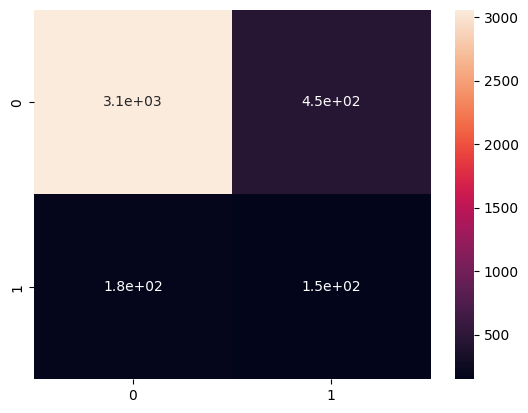

In [ ]:
# Logistic Regression
# define models and parameters
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res, y_train_res)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Predicting on the test data
lr_pred = grid_result.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True)

# Classification report
print(classification_report(y_test, lr_pred))



Text(0, 0.5, 'True positive rate')

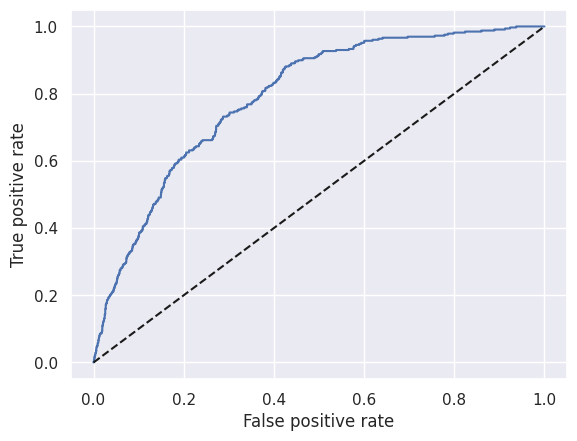

In [ ]:
# plot roc curve
y_pred_proba = grid_result.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 2: Naive Bayes

Next, two Naive Bayes models were built. The first block of code outlines the Gaussian Naive Bayes model while the next block of code outlines the Bernoulli Naive Bayes classification model.

              precision    recall  f1-score   support

           0       0.97      0.60      0.74      3510
           1       0.15      0.79      0.26       328

    accuracy                           0.61      3838
   macro avg       0.56      0.69      0.50      3838
weighted avg       0.90      0.61      0.70      3838



Text(0, 0.5, 'True positive rate')

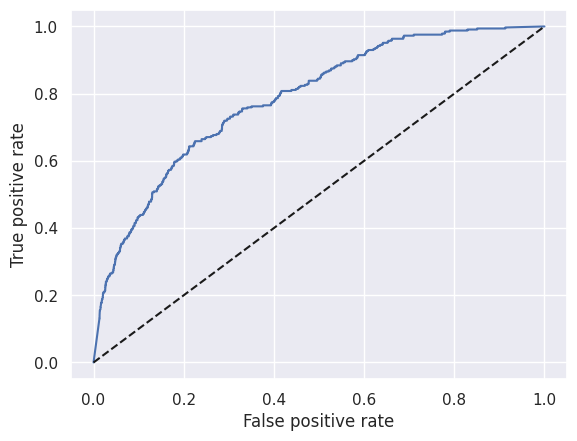

In [ ]:
# Naive Bayes - Gaussian Classifier
gnb = GaussianNB()
# Model training
gnb.fit(X_train_res, y_train_res)

# Predict Output
gnb_pred = gnb.predict(x_test)

# Classification report
print(classification_report(y_test, gnb_pred))

# plot roc curve
y_pred_proba = gnb.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Considering that the target variable was binary, the Bernoulli classifier is the better model to employ. This is verified through the higher precision, f1, recall, accuracy, and ROC scores. The way in which the Bernoulli classification model was produced is outlines as follows: The model was first defined using sklearn.niave_bayes’s BernoulliNB() function and saved to the ‘bnb’ variable. The BernoulliNB() function was employed as the output variable is binary (0/1). The model was then fitted to the training data using the .fit() function resulting in the following code: bnb.fit(x_train, y_train). The predictions of the model were determined using the .predict() function resulting in the following code: bnb.predict(x_test), which was saved as ‘bnb_pred’. Finally, a classification report was outputted using sklearn.metrics’s classification_report function in order to access the model results. Additionally, an ROC curve was plotted using numpy’s .predict_proba function in conjunction with matplotlib.pyplot’s plt.plot function.


              precision    recall  f1-score   support

           0       0.97      0.77      0.86      3510
           1       0.23      0.70      0.34       328

    accuracy                           0.77      3838
   macro avg       0.60      0.74      0.60      3838
weighted avg       0.90      0.77      0.82      3838



Text(0, 0.5, 'True positive rate')

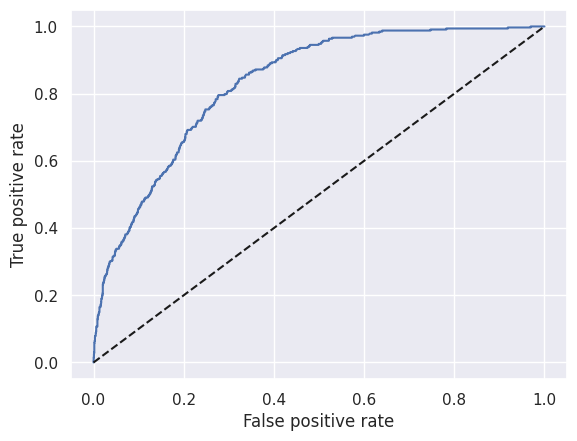

In [ ]:
# Naive Bayes - Bernoulli Classifier
bnb = BernoulliNB()
# Model training
bnb.fit(X_train_res, y_train_res)

# Predict Output
bnb_pred = bnb.predict(x_test)

# Classification report
print(classification_report(y_test, bnb_pred))

# plot roc curve
y_pred_proba = bnb.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 3: Neural Network

The third model to be built was the Neural Network model. The Neural Network model for this project was set up by first defining the Neural Network with the Sequential() function and setting this function to the ‘NN’ variable for future reference. The Sequential() function is an API that is used to organize the Keras layers for the Neural Network (Keras - Models, n.d.). The layers were defined using the .add function in conjunction with the Dense function of Keras.layers. Within the layers, the first thing defined was the units. Units are defined as the dimensionality of the output space (Keras - Models, n.d.). Next, the activation was defined followed by the input dimension. Within these layers the activation was set to relu. Essentially, relu is an activation function that aids with the vanishing gradients issue by introducing the property of nonlinearity to a deep learning model (Krishnamurthy, 2022). The optimizer for this model was set to Adam while the loss function was set to binary_crossentropy, and the metrics was set to accuracy. The optimizer was set to Adam as it is a stochastic gradient descent method that updates the parameters of the model using the first and second moments of the gradients automatically resulting in a more efficient model (Keras - Models, n.d.). The loss function was set to binary_crossentropy in order to minimize the mistakes made by the model. Essentially this function works by calculating the cross-entropy loss between the predicted classes and the true classes and works to minimize it (Keras - Models, n.d.). Finally, the metric was set to accuracy in order to optimize the model on the basis of accuracy. All of these components were then set to the model using the .compile function resulting in the following code: NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']). Then this optimized model was fitted to the train data using the .fit() function. The parameters were set such that the ‘validation_data’ parameter was indicated as the test data, ‘epochs’ was set to 40, and ‘batch_size’ was set to 32. The model was then validated using the .predict() function and the results were evaluated using sklearn.metrics’s confusion_matrix function and classification_report function.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
878/878 [==============================] - 9s 8ms/step - loss: 0.5312 - accuracy: 0.7360 - val_loss: 0.4599 - val_accuracy: 0.7668
Epoch 2/40
878/878 [==============================] - 6s 7ms/step - loss: 0.4229 - accuracy: 0.8108 - val_loss: 0.4212 - val_accuracy: 0.7858
Epoch 3/40
878/878 [==============================] - 5s 6ms/step - loss: 0.3807 - accuracy: 0.8353 - val_loss: 0.3715 - val_accuracy: 0.8142
Epoch 4/40
878/878 [========

<Axes: >

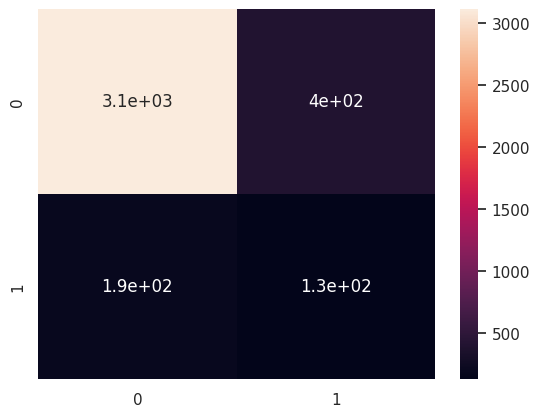

In [ ]:
# Neural Network

NN = Sequential()
NN.add(Dense(8, activation='relu', input_dim=40))
NN.add(Dense(1, activation='sigmoid'))
NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NN.summary()
hist = NN.fit(X_train_res, y_train_res, validation_data=(x_test, y_test),
              epochs=40, batch_size=32)

#validate the model
nn_pred = NN.predict(x_test)> 0.5

# Classification report
print(classification_report(y_test, nn_pred))

# Confusion matrix
cm = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm, annot=True)


120/120 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True positive rate')

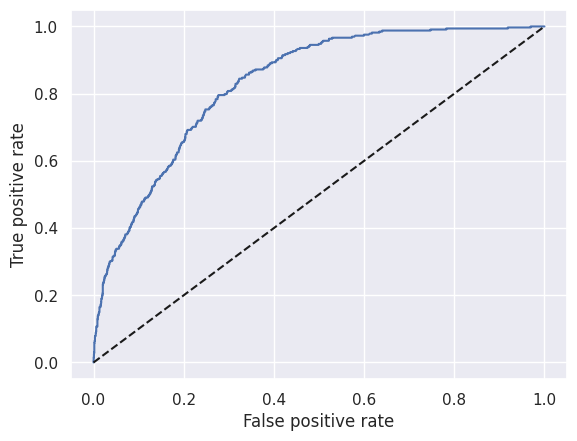

In [ ]:
# NN ROC Plot
def predict_prob(number):
  return [number[0],1-number[0]]
y_prob = np.array(list(map(predict_prob, NN.predict(x_test))))
predict_classes=np.argmax(predict_prob,axis=0)
fpr2, tpr2, threshold = roc_curve(y_test, y_prob[:,1])
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 4: Decision Tree

Here we are building a decision tree model. The first step in setting up the decision tree algorithm was to determine the decision tree depth. This was accomplished using a for-loop in which the algorithmic function was set, fitted, and predicted to output the maximum tree depth associated with the highest accuracy. When carrying out this for-loop, the maximum depth was determined to be 2 with an accuracy of 0.91. Based on this, sklearn.tree's DecisionTreeClassifier function was utilized with the specification of the tree depth as four and the ‘random_state’ set to 599. The random state was set in order for the result obtained to be reproducible. The .fit() function was then used in conjunction with the model which was saved as ‘dt’. In order to validate the model, the .predict() function was employed. Finally a classification report was outputted, using sklearn.metrics’s classification_report function, in order to access the model results. Additionally, an ROC curve was plotted using numpy’s .predict_proba function in conjunction with sklearn.metrics‘s roc_curve function and matplotlib.pyplot’s plt.plot function.


In [ ]:
#optimizing decision tree depth
score = []
for i in range(1,12):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train_res,y_train_res)
    y_pred = dtree.predict(x_test)
    score.append(round(accuracy_score(y_test,y_pred),4))
print("Maximum depth", score.index(max(score)))
print( "Maximum score", max(score))

Maximum depth 10
Maximum score 0.7499


0.7344971339239187
[[2602  908]
 [ 111  217]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      3510
           1       0.19      0.66      0.30       328

    accuracy                           0.73      3838
   macro avg       0.58      0.70      0.57      3838
weighted avg       0.89      0.73      0.79      3838



Text(0, 0.5, 'True positive rate')

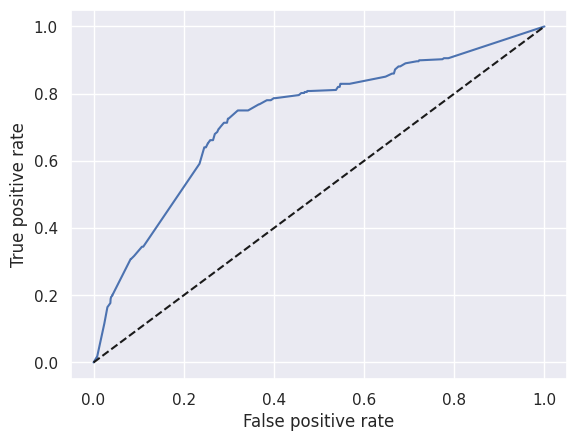

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth = 10, random_state = 599)
dt.fit(X_train_res,y_train_res)

#validate the model
dt_pred=dt.predict(x_test)
print(accuracy_score(y_test, dt_pred))

#Confusion matrix
cm=confusion_matrix(y_test,dt_pred)
print(cm)

# Classification report
print(classification_report(y_test, dt_pred))

# plot roc curve
y_pred_proba = dt.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


### Model 5: Random Forest

The fifth model that was built was the Random Forest model as seen below. The Random Forest model was set up by first defining the hyperparameters, then setting up the model based on the hyperparameters, validating the model, and then evaluating the model’s results. The hyperparameters were set up through a hyperparameter grid which specified ‘n_estimators’ as [100, 200, 500], ‘max_depth’ as [4,5,6,7,8], and ‘criterion’ as [‘gini’, ‘entropy’]. The ‘n_estimators’ hyperparameter indicates the number of trees within the Random Forest. The ‘max_depth’ hyperparameter indicates the maximum depth of the tree. The ‘criterion’ is the function to measure the quality of the split. The ‘gini’ and ‘entropy’ criterion are essentially measures of the purity of the splits made by the Random Forest model from the root node to the leaf nodes (Dash, 2022). These were both indicated in order to find the model that was produced with the better splits based on the different forms of measurements of impurities. The best parameters, with a accuracy score of 0.820997, was deteremined using {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}. Next, the model was defined using sklearn.ensemble’s RandomForestClassifier and set to the ‘rf’ variable. The GridSearchCV function was used to determine the best hyperparameters. The estimator within this function was set to the Random Forest classifier and the ‘param_grid’ was set to the hyperparameters previously discussed. The ‘cv’ variable, which indicates the cross validation, was set to 3. Then the model was fit to the train data using the .fit() function. The model was validated using the .predict() function and finally evaluated using sklearn.metrics’s confusion_matrix function and classification_report function.


Best: 0.820997 using {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      3510
           1       0.23      0.67      0.35       328

    accuracy                           0.78      3838
   macro avg       0.60      0.73      0.61      3838
weighted avg       0.90      0.78      0.82      3838



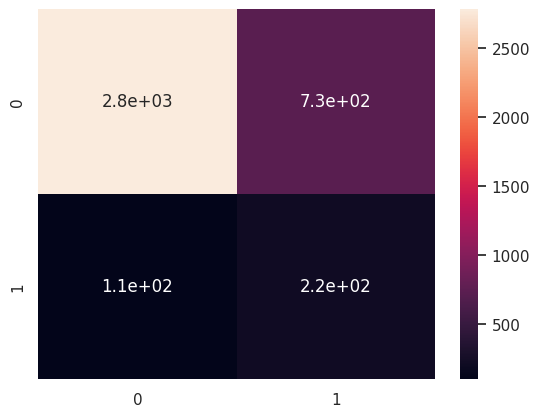

In [ ]:
#  Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# define model and determine best params
rf=RandomForestClassifier(random_state = 599)
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
rf_grid.fit(X_train_res, y_train_res)

# summarize results
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

#validate the model
rf_pred = rf_grid.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True)

# Classification report
print(classification_report(y_test, rf_pred))


Text(0, 0.5, 'True positive rate')

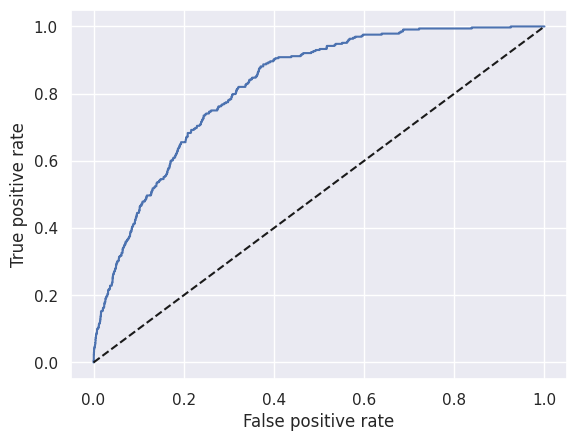

In [ ]:
# plot roc curve for random forest
y_pred_proba = rf_grid.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 6: Linear Discriminant Analysis (LDA)

Finally, below is the code outlining how the Linear Discriminant Analysis model was built. The LDA model was first defined using sklearn.discriminant_analysis’s LinearDiscriminantAnalysis() function. Then in order to define a grid search function to determine the best hyperparameters, a general set of parameters to be tested was defined. The variable ‘cv’ contained the cross validation splits. These splits were set through the function RepeatedStratifiedKFold(), in which ‘n_splits’ was set to 10, ‘n_repeats’ was set to 3, and ‘random_state’ was set to 1. The variable ‘grid’ was defined as a dictionary in which the ‘solver’ was set to ‘svd’. The solver ‘svd’ is recommended for data with a larger number of features, which was the case for the project at hand. Then, the gridsearch was set using the GridSearch() function in order to determine the best parameters. The best hyperparameters were then fit to the train data using the .fit() function. The predictions were then determined for the test set using the .predict() function. Finally, the results were evaluated using sklearn.metrics’s confusion_matrix function and classification_report function.

In [ ]:
# Linear Discriminant Analysis (LDA)
# define model
model = LinearDiscriminantAnalysis()

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['solver'] = ['svd']

# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train_res, y_train_res)

# get the hyperparameters with the best score
results.best_params_

# Predictions for test data
lda_pred = search.predict(x_test)

# Print confusion matrix
confusion_matrix(y_test, lda_pred)
print(classification_report(y_test,lda_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3510
           1       0.25      0.50      0.33       328

    accuracy                           0.83      3838
   macro avg       0.60      0.68      0.62      3838
weighted avg       0.89      0.83      0.85      3838



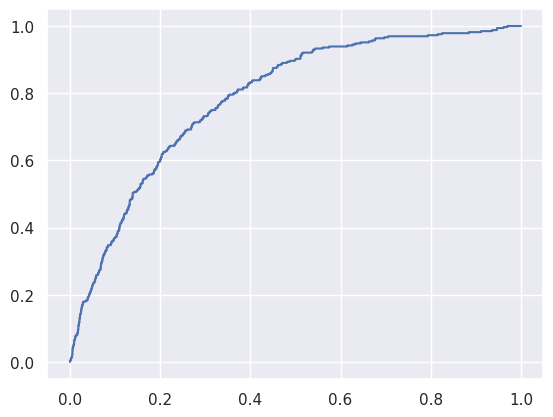

In [ ]:
#fit linear discriminant analysis  model and plot ROC curve
y_pred = results.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Linear Discriminant Analysis , AUC="+str(AUROC))

In order to compare the validity and proficiency of all six models, a combined ROC plot for each of the models was built as seen below. The results of the ROC plot indicate that the Neural Network and Bernoulli Naive Bayes models out performed the other models in terms of ROC scores. This is clear through the 0.83 AUC scores the two models, Neural Network and Bernoulli Naive Bayes, recieved.

120/120 [==============================] - 0s 1ms/step


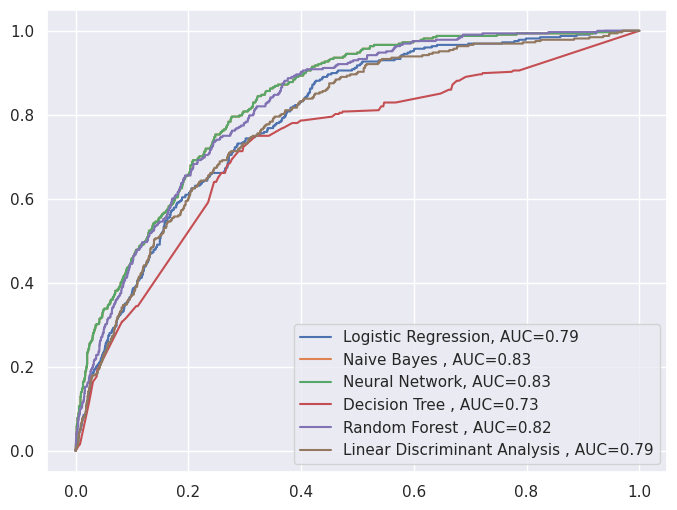

In [ ]:
# Comparison of All 6 Models

#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
y_pred_proba = grid_result.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(AUROC))

#fit naive bayes model and plot ROC curve
y_pred = bnb.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Naive Bayes , AUC="+str(AUROC))

# fit and plot neural network ROC curve
def predict_prob(number):
  return [number[0],1-number[0]]
y_prob = np.array(list(map(predict_prob, NN.predict(x_test))))
predict_classes=np.argmax(predict_prob,axis=0)
fpr2, tpr2, threshold = roc_curve(y_test, y_prob[:,1])
AUROC = 0.83
sns.set()
plt.plot(fpr, tpr, label="Neural Network, AUC="+str(AUROC))

#fit decision tree model and plot ROC curve
y_pred = dt.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Decision Tree , AUC="+str(AUROC))

#fit random forest model and plot ROC curve
y_pred = rf_grid.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Random Forest , AUC="+str(AUROC))

#fit linear discriminant analysis  model and plot ROC curve
y_pred = results.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Linear Discriminant Analysis , AUC="+str(AUROC))

#add legend
sns.set(rc={'figure.figsize':(8,6)})
plt.legend();


In order to further evaluate the models and compare them to one another a bar chart of the performance of each of the models was built below. The models were evaluated on the following metrics: precision, recall, F1, accuracy, and ROC scores. The model that outperformed all others models is the Neural Network model. It should be noted that LR = linear regression, BNB = Bernoulli Naive Bayes, NN = Neural Network, DT = Decision Tree, RF = Random Forest, and LDA = Linear Discriminant Analysis.

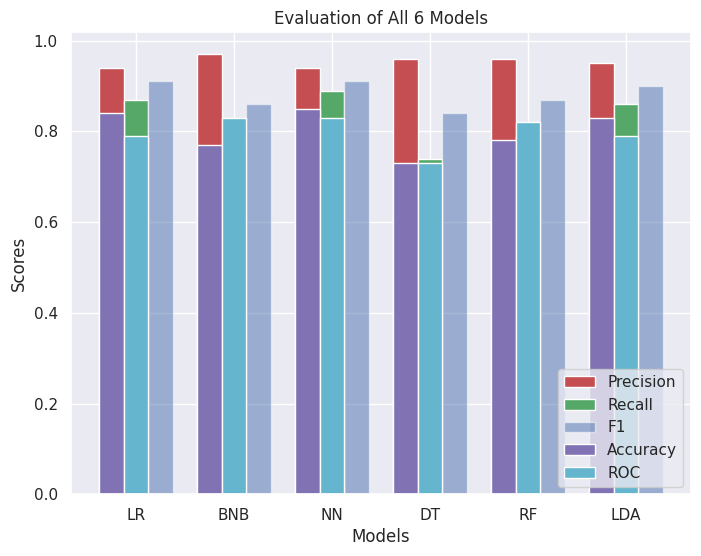

In [ ]:
# Eval of All 6 Models
N = 6
ind = np.arange(N)
width = 0.25

xvals = [0.94,0.97,0.94,0.96,0.96,0.95]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [0.87,0.77,0.89,0.74,0.79,0.86]
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = [0.91,0.86,0.91,0.84,0.87,0.90]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b', alpha=0.5)

avals = [0.84,0.77,0.85,0.73,0.78,0.83]
bar4 = plt.bar(ind, avals, width, color = 'm')

bvals = [0.79,0.83,0.83,0.73,0.82,0.79]
bar5 = plt.bar(ind+width, bvals, width, color='c')

plt.xlabel("Models")
plt.ylabel('Scores')
plt.title("Evaluation of All 6 Models")

plt.xticks(ind+width,['LR', 'BNB', 'NN', 'DT', 'RF', 'LDA'])
plt.legend( (bar1, bar2, bar3, bar4, bar5),
 ('Precision', 'Recall', 'F1', 'Accuracy', 'ROC'), loc = 'lower right')
plt.show()

## References

GeeksforGeeks. (2023). Supervised and Unsupervised learning. GeeksforGeeks. https://www.geeksforgeeks.org/supervised-unsupervised-learning/

GeeksforGeeks. (2023a). Advantages and Disadvantages of logistic regression. GeeksforGeeks. https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/

Kandel, I. (2020). The effect of batch size on the generalizability of the convolutional neural networks on a histopathology dataset.https://www.sciencedirect.com/science/article/pii/S2405959519303455#:~:text=In%20practical%20terms%2C%20to%20determine,advantage%20of%20the%20GPUs%20processing.

Keras - Models. (n.d.). Tutorialspoint. https://www.tutorialspoint.com/keras/keras_models.htm#:~:text=The%20core%20idea%20of%20Sequential,finally%20reaches%20the%20output%20layer.

Krishnamurthy, B. (2022). An introduction to the RELU activation function. Built In. https://builtin.com/machine-learning/relu-activation-function

Ognjanovski, G. (2022, May 13). Everything you need to know about Neural Networks and Backpropagation — Machine Learning Easy and Fun. Medium. https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a

Raj, J. T. (2021, December 8). A beginner’s guide to dimensionality reduction in Machine Learning. Medium. https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e

Shin, T. (2022, November 10). An extensive step by step guide to exploratory data analysis. Medium. https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

What is Logistic regression? | IBM. (n.d.). https://www.ibm.com/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables.

What is a Neural Network? - Artificial Neural Network Explained - AWS. (n.d.). Amazon Web Services, Inc. https://aws.amazon.com/what-is/neural-network/#:~:text=A%20neural%20network%20is%20a,that%20resembles%20the%20human%20brain.

